**Засоби підготовки та аналізу даних**            
ФБ-22 Шеїна Еліна                           
Лабораторна робота №6

Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри прямої
k = 7  # нахил
b = -5  # зміщення

# Кількість точок, які ви хочете згенерувати
num_points = 50

# Згенерувати випадкові значення для змінної xx
# Тут ви можете вказати якийсь певний діапазон для xx
# Наприклад, від -10 до 10
x = np.random.uniform(-10, 10, num_points)

# Згенерувати випадкові значення для змінної yy, враховуючи помилку
# yy = kk * xx + bb + помилка
# помилка може бути додана, щоб зробити розподіл точок більш реалістичним
# Тут 1.5 - це стандартне відхилення помилки
error = np.random.normal(0, 10, num_points)
y = k * x + b + error

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [ ]:
def least_squares_fit(x, y):

    x_mean = x.mean()
    y_mean = y.mean()

    k = ((x - x_mean)*(y - y_mean)).sum()/((x - x_mean)**2).sum()

    b = y_mean - k*x_mean


    return k, b

estimated_k, estimated_b = least_squares_fit(x, y)

print("Оцінка нахилу (k):", estimated_k)
print("Оцінка зміщення (b):", estimated_b)
print("Оригінальне значення нахилу (k):", k)
print("Оригінальне значення зміщення (b):", b)

Оцінка нахилу (k): 7.173361992438387
Оцінка зміщення (b): -5.441348541022048
Оригінальне значення нахилу (k): 7
Оригінальне значення зміщення (b): -5


In [ ]:
polyfit_params = np.polyfit(x, y, 1)

print("Оцінка нахилу за допомогою np.polyfit():", polyfit_params[0])
print("Оцінка зміщення за допомогою np.polyfit():", polyfit_params[1])

Оцінка нахилу за допомогою np.polyfit(): 7.173361992438383
Оцінка зміщення за допомогою np.polyfit(): -5.441348541022053


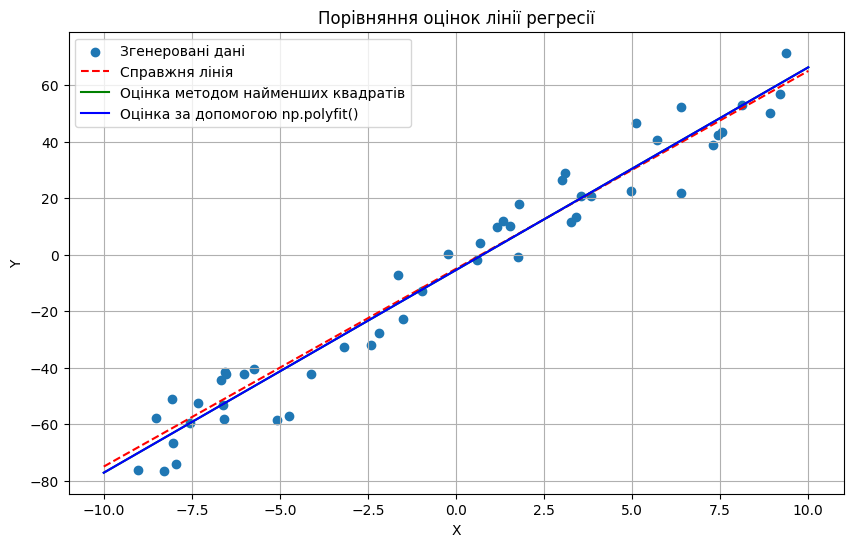

In [ ]:
# Генерація точок для відображення згенерованої лінії
line_x = np.linspace(-10, 10, 100)
line_y_true = k * line_x + b
line_y_estimated = estimated_k * line_x + estimated_b
line_y_polyfit = polyfit_params[0] * line_x + polyfit_params[1]

# Відображення результатів на графіку
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(line_x, line_y_true, color='red', linestyle='--', label='Справжня лінія')
plt.plot(line_x, line_y_estimated, color='green', label='Оцінка методом найменших квадратів')
plt.plot(line_x, line_y_polyfit, color='blue', label='Оцінка за допомогою np.polyfit()')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Порівняння оцінок лінії регресії')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    # Ініціалізація випадковими значеннями нахилу та зміщення
    k = np.random.randn()
    b = np.random.randn()

    # Кількість точок
    m = len(x)

    for _ in range(n_iter):
        # Розрахунок градієнтів
        k_gradient = -(2/m) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/m) * np.sum(y - (k*x + b))

        # Оновлення параметрів за допомогою градієнтного спуску
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

    return k, b

learning_rate = 0.01
n_iter = 1000

optimal_k, optimal_b = gradient_descent(x, y, learning_rate, n_iter)
print("Оптимальний нахил (k):", optimal_k)
print("Оптимальне зміщення (b):", optimal_b)

Оптимальний нахил (k): 7.173361992550988
Оптимальне зміщення (b): -5.441348532182445


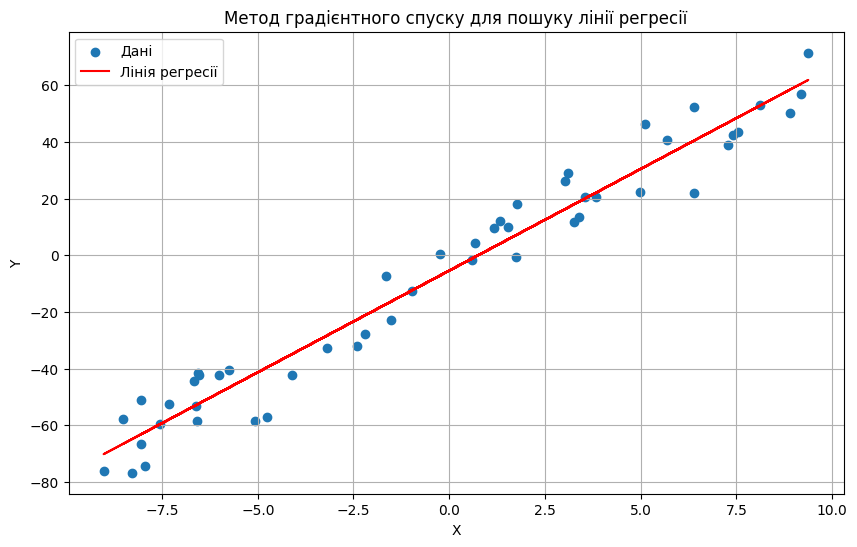

In [ ]:
# Отримання лінії регресії
regression_line = optimal_k * x + optimal_b

# Відображення результатів на графіку
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, regression_line, color='red', label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Метод градієнтного спуску для пошуку лінії регресії')
plt.legend()
plt.grid(True)
plt.show()

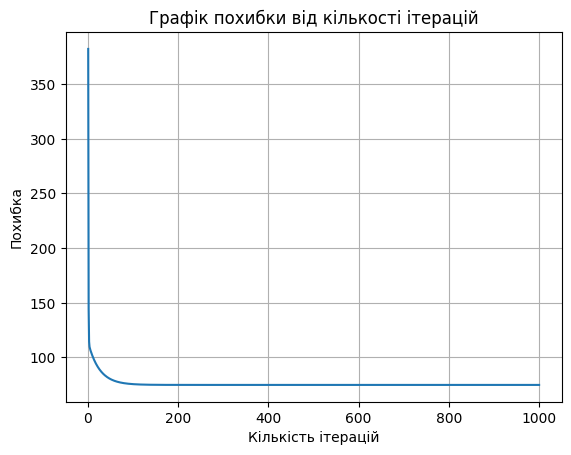

In [ ]:
def gradient_descent_loss(x, y, learning_rate=0.01, n_iter=1000):
    # Ініціалізація випадковими значеннями нахилу та зміщення
    k = np.random.randn()
    b = np.random.randn()

    # Кількість точок
    m = len(x)

    # Зберігання значень функції втрат після кожної ітерації
    loss_history = []

    for _ in range(n_iter):
        # Розрахунок градієнтів
        k_gradient = -(2/m) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/m) * np.sum(y - (k*x + b))

        # Оновлення параметрів за допомогою градієнтного спуску
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

        # Розрахунок функції втрат
        loss = np.mean((y - (k*x + b))**2)
        loss_history.append(loss)

    return k, b, loss_history

optimal_k, optimal_b, loss_history = gradient_descent_loss(x, y, learning_rate, n_iter)

# Побудова графіка похибки від кількості ітерацій
plt.plot(np.arange(1, n_iter + 1), loss_history)
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Графік похибки від кількості ітерацій')
plt.grid(True)
plt.show()

In [ ]:
estimated_k_polyfit = polyfit_params[0]
estimated_b_polyfit = polyfit_params[1]

# Виведення результатів
print("Оптимальний нахил (градієнтний спуск):", optimal_k)
print("Оптимальне зміщення (градієнтний спуск):", optimal_b)
print("Оцінка нахилу (метод найменших квадратів):", estimated_k)
print("Оцінка зміщення (метод найменших квадратів):", estimated_b)
print("Оцінка нахилу (np.polyfit()):", estimated_k_polyfit)
print("Оцінка зміщення (np.polyfit()):", estimated_b_polyfit)

Оптимальний нахил (градієнтний спуск): 7.173361992590021
Оптимальне зміщення (градієнтний спуск): -5.4413485291182235
Оцінка нахилу (метод найменших квадратів): 7.173361992438387
Оцінка зміщення (метод найменших квадратів): -5.441348541022048
Оцінка нахилу (np.polyfit()): 7.173361992438383
Оцінка зміщення (np.polyfit()): -5.441348541022053
